# Orbital Dynamics Term Project
# PHYS 305, Fall 2022
# Sarah Stamer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

1: RK4 Integration

In [2712]:
def orbitsys(u):
    """
    This function takes the input state and returns the output state, which is the velocity and acceleration.
    u: an array containing [x, y, vx, vy]
    """
    x,y,vx,vy = u
    r = np.sqrt(x**2+y**2)
    f = G*M_sun/r**3
    return np.array([vx, vy, -f*x, -f*y])

def RK4_step(t, y, h, g, *P):
    """
    Implements a single step of a fourth-order, explicit Runge-Kutta scheme
    """
    k1 = h*g(y,*P)
    k2 = h*g(y+0.5*k1,*P)
    k3 = h*g(y+0.5*k2,*P)
    k4 = h*g(y+k3,*P)
    return y + (k1/6) + (k2/3) + (k3/3) + (k4/6)

def odeSolve(t0, y0, tmax, h, RHS, method, *P):
    """
    ODE driver with constant step-size, allowing systems of ODE's
    """
    # make array of times and find length of array
    t = np.arange(t0,tmax+h,h)
    ntimes,  = t.shape

    # find out if we are solving a scalar ODE or a system of ODEs, and allocate space accordingly
    
    if type(y0) in [int, float]:  # check if primitive type -- means only one eqn
        neqn = 1
        y = np.zeros( ntimes )
    else:                         # otherwise assume a numpy array -- a system of more than one eqn
        neqn, = y0.shape
        y = np.zeros( (ntimes, neqn) )

    # set first element of solution to initial conditions (possibly a vector) 
    y[0] = y0
    x0 = y0[0]
    vx_0 = y0[2]
    vy_0 = y0[3] 

    # march on...
    for i in range(0,ntimes-1):
            #print(t[i])
            y[i+1] = method(t[i], y[i], h, RHS, *P)
            #print(y[i+1])
            
            def E(v, r):
                """
                This function returns the total energy for a given velocity and radius.
                v: velocity
                r: radius
                """
                return (0.5*(v**2))-((G*M_sun)/r)
            E_tot_0 = E(np.sqrt(vy_0**2+vx_0**2), x0) #Initial Energy
            #Getting final velocity and final position from last row, used in delta E to get the final energy
            v_final = np.sqrt(y[i+1][2]**2 + y[i+1][3]**2)
            r_final = np.sqrt(y[i+1][0]**2 + y[i+1][1]**2)
            
            delta_E = np.abs((E(v_final,r_final)-E_tot_0)/E_tot_0) #Smaller than 10^-3 for all integration times
            #print(delta_E)
            
            # Check the Delta E Criterion every step
            if delta_E >= 1e-3:
                print('Delta E is not smaller than 10^-3 for all integration times')
            #else:
                #print(y[i+1]) #Prints out the state that was calculated [x, y, vx, vy]
                
    return t,y

In [2716]:
# Constants
r_Jupiter = 5.2*(1.495978707e11) #5.2 AU in meters
omega = 1.6793e-8 #rad/s, given in problem
G = 6.674e-11
M_sun = 2e30 #kg

#Position Equations for Jupiter
x_pos_Jupiter = lambda t : r_Jupiter*np.cos((omega*t)-(np.pi/6))
y_pos_Jupiter = lambda t : r_Jupiter*np.sin((omega*t)-(np.pi/6))

#Positions and Velocities for Satellite
x0 = 1.495978707e11 #1 AU in meters
y0 = 0  
v_initial = (2*(((-G*M_sun)/r_Jupiter)+((G*M_sun)/x0)))**(0.5) #Energy Conservation
#print(v_initial)
theta = 2.696617470135335 #np.pi/160
#v = 24000
vx_corr = 35765.850775760395 
vy_corr = -17055.75788207565
vx_0 = vx_corr 
vy_0 = vy_corr + 29789.37 
#print(vy_0/vx_0)
#print(vx_0, vy_0)
#print(np.sqrt(vx_0**2+vy_0**2))
state_0 = np.array([x0, y0, vx_0, vy_0]) #Creating an array containing the initial state variables

t_max = 31536000*2.08
t, y = odeSolve(0, state_0, t_max, 5000, orbitsys, RK4_step)
print(y[-1])
#print(y[int(len(t)/2)])

[ 6.44393445e+11  4.09282964e+11 -1.80228654e+03  1.81143383e+03]


In [2714]:
#To find vx_corr and vy_corr
theta = 2*math.pi *.42918 #Angle I found
vy_boost = 29789.37
v_initial = (2*(((-G*M_sun)/r_Jupiter)+((G*M_sun)/x0)))**(0.5) #Energy Conservation

#Quadratic Formula
a = (1/math.cos(theta))**2
b = 2*vy_boost*math.tan(theta)
c = -1*(v_initial**2 - 29789.37**2)

vx_corr = (-1*b + (b**2 - 4*a*c)**(.5))/(2*a)
print("X correction velocity (m/s): ", vx_corr)

vy_corr = math.tan(theta)*vx_corr
print("Y correction velocity (m/s): ", vy_corr)


v = np.array((vx_corr + 0,  vycorr1  + vy_boost)) #the initial velocity vector of the spaceship at t=0
print(v)
print(np.sqrt(35765.85077576**2+12733.61211792**2))
print(v_initial)

X correction velocity (m/s):  35765.850775760395
Y correction velocity (m/s):  -17055.75788207565
[35765.85077576 12733.61211792]
37964.99650050783
37964.99650050965


2: Convergence

In [2682]:
def odeSolve(t0, y0, tmax, h, RHS, method, *P):
    """
    ODE driver with constant step-size, allowing systems of ODE's
    """
    # make array of times and find length of array
    t = np.arange(t0,tmax+h,h)
    ntimes,  = t.shape

    # find out if we are solving a scalar ODE or a system of ODEs, and allocate space accordingly
    
    if type(y0) in [int, float]:  # check if primitive type -- means only one eqn
        neqn = 1
        y = np.zeros( ntimes )
    else:                         # otherwise assume a numpy array -- a system of more than one eqn
        neqn, = y0.shape
        y = np.zeros( (ntimes, neqn) )

    # set first element of solution to initial conditions (possibly a vector) 
    y[0]=y0

    # march on...
    for i in range(0,ntimes-1):
            y[i+1] = method(t[i], y[i], h, RHS, *P)
            
    return t,y

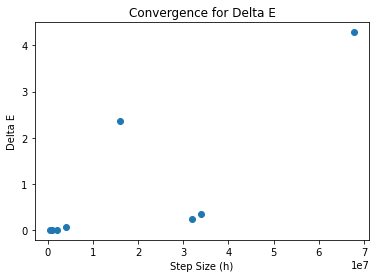

In [2683]:
h_list = [t_max, 500000, 1000000, 2000000, 4000000, 16000000, 32000000, t_max/2]
delta_E_list = []
for h in h_list:
    t, y = odeSolve(0, state_0, t_max, h, orbitsys, RK4_step)
    v_final = np.sqrt(y[-1][-1]**2 + y[-1][-2]**2) #Using last state to get final velocity (last two elements of last row)
    r_final = np.sqrt(y[-1][-4]**2 + y[-1][-3]**2) #Using last state to get final position (first two elements of last row)
    def E(v, r):
        """
        This function returns the total energy for a given velocity and radius.
        v: velocity
        r: radius
        """
        return (0.5*(v**2))-((G*M_sun)/r)
    E_tot_0 = E(np.sqrt(vx_0**2+vy_0**2), x0)
    delta_E = np.abs((E(v_final,r_final)-E_tot_0)/E_tot_0)
    delta_E_list.append(delta_E)

plt.plot(h_list, delta_E_list,'o')
plt.xlabel('Step Size (h)')
plt.ylabel('Delta E')
plt.title('Convergence for Delta E')
plt.show()

[  2.17159826 -37.49925156]


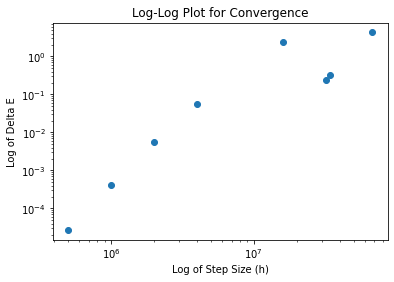

In [2684]:
#Log-log: slope is power
plt.loglog(h_list, delta_E_list,'o')
plt.xlabel('Log of Step Size (h)')
plt.ylabel('Log of Delta E')
plt.title('Log-Log Plot for Convergence')
fit = np.polyfit(np.log(h_list), np.log(delta_E_list), 1) #Making a linear fit to the log-log plot
print(fit)

3: Self-Convergence

In [2685]:
def odeSolve(t0, y0, tmax, h, RHS, method, *P):
    """
    ODE driver with constant step-size, allowing systems of ODE's
    """
    # make array of times and find length of array
    t = np.arange(t0,tmax+h,h)
    ntimes,  = t.shape

    # find out if we are solving a scalar ODE or a system of ODEs, and allocate space accordingly
    
    if type(y0) in [int, float]:  # check if primitive type -- means only one eqn
        neqn = 1
        y = np.zeros( ntimes )
    else:                         # otherwise assume a numpy array -- a system of more than one eqn
        neqn, = y0.shape
        y = np.zeros( (ntimes, neqn) )

    # set first element of solution to initial conditions (possibly a vector) 
    y[0] = y0

    # march on...
    for i in range(0,ntimes-1):
        y[i+1] = method(t[i], y[i], h, RHS, *P)

    return t,y

In [2686]:
h2 = 5000 #Step Size
h3 = 5000/2 #Half of Step Size

#Analytic Convergence
def func_RHS(n):
    func_RHS_list = []
    h_list = []
    for x in [t_max/h2, t_max/(5000*2), t_max/(5000*4), t_max/(5000*8), t_max/(5000*16)]:
        h = t_max/x
        h_list.append(h)
        func_RHS_list.append((((h/h3)**n)-1)/(2**n - 1))
    return func_RHS_list, h_list

#Self-Convergence
def func_LHS(n):
    func_LHS_list = []
    h_list = []
    for x in [t_max/h2, t_max/(5000*2), t_max/(5000*4), t_max/(5000*8), t_max/(5000*16)]: # Different Step Sizes
        h = t_max/x
        h_list.append(h) 
    if n == 4:
        # Solving the ODE with step size h2 and h3
        t, y_RK4_h2 = odeSolve(0, state_0, t_max, h2, orbitsys, RK4_step)
        t, y_RK4_h3 = odeSolve(0, state_0, t_max, h3, orbitsys, RK4_step)
        y_h3 = y_RK4_h3[int(t_max/h3)]
        y_h2 = y_RK4_h2[int(t_max/h2)]
        # Solving at different step sizes
        for h in h_list:
            t, y_RK4_h = odeSolve(0, state_0, t_max, h, orbitsys, RK4_step)
            func_LHS_list.append((y_RK4_h[int(t_max/h)]-y_h3)/(y_h2-y_h3)) 
    return func_LHS_list, h_list


l_list_4, h_list_4 = func_LHS(4)
r_list_4, h_list_4 = func_RHS(4)

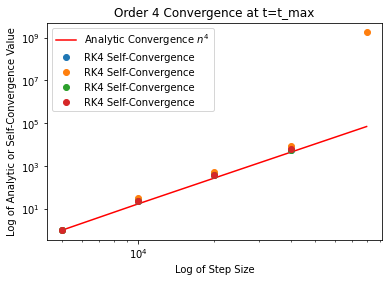

In [2687]:
fig,ax = plt.subplots()
ax.loglog(h_list_4,r_list_4,'r',label = 'Analytic Convergence ' + r'$n^4$')
ax.loglog(h_list_4,l_list_4,'o',label = 'RK4 Self-Convergence')
ax.set_title('Order 4 Convergence at t=t_max')
ax.set_xlabel('Log of Step Size')
ax.set_ylabel('Log of Analytic or Self-Convergence Value')
ax.legend(loc='upper left')

4: Richardson Extrapolation

In [2721]:
def orbitsys(u):
    """
    This function takes the input state and returns the output state, which is the velocity and acceleration.
    u: an array containing [x, y, vx, vy]
    """
    x,y,vx,vy = u
    r = np.sqrt(x**2+y**2)
    f = G*M_sun/r**3
    return np.array([vx, vy, -f*x, -f*y])

def RK4_step(t, y, h, g, *P):
    """
    Implements a single step of a fourth-order, explicit Runge-Kutta scheme
    """
    k1 = h*g(y,*P)
    k2 = h*g(y+0.5*k1,*P)
    k3 = h*g(y+0.5*k2,*P)
    k4 = h*g(y+k3,*P)
    return y + (k1/6) + (k2/3) + (k3/3) + (k4/6)

def odeSolve(t0, y0, tmax, h, RHS, method, *P):
    """
    ODE driver with constant step-size, allowing systems of ODE's
    """
    # make array of times and find length of array
    t = np.arange(t0,tmax+h,h)
    ntimes,  = t.shape

    # find out if we are solving a scalar ODE or a system of ODEs, and allocate space accordingly
    
    if type(y0) in [int, float]:  # check if primitive type -- means only one eqn
        neqn = 1
        y = np.zeros( ntimes )
    else:                         # otherwise assume a numpy array -- a system of more than one eqn
        neqn, = y0.shape
        y = np.zeros( (ntimes, neqn) )

    # set first element of solution to initial conditions (possibly a vector) 
    y[0] = y0

    # march on...
    for i in range(0,ntimes-1):
        y[i+1] = method(t[i], y[i], h, RHS, *P)

    return t,y

In [2723]:
h1 = 5000 #Step Size
h2 = 5000/2 #Half of Step Size
p=4 #Expected Order of Convergence for RK4

t, y_RK4_h1 = odeSolve(0, state_0, int(t_max/2), h1, orbitsys, RK4_step)
t, y_RK4_h2 = odeSolve(0, state_0, int(t_max/2), h2, orbitsys, RK4_step)
print(y_RK4_h1[-1], y_RK4_h2[-1]) #Used to get x1, x2, y1, y2
x1 = 5.92873011e+11
y1 = 2.85359087e+11
x2 = 5.92859570e+11
y2 = 2.85344585e+11

#Both from the RK4 Integration at t_max/2
x_exact = 5.92873011e+11
y_exact = 2.85359087e+11

x = (2**p * x2 - x1)/(2**p -1)
y = (2**p * y2 - y1)/(2**p -1)

#Error Between RK4 and Richardson
x_err = np.abs(x_exact - x)
y_err = np.abs(y_exact - y)
print(x_err, y_err)

[5.92873011e+11 2.85359087e+11 5.37639443e+03 5.80077724e+03] [5.92859570e+11 2.85344585e+11 5.37708899e+03 5.80111153e+03]
14337066.666625977 15468800.0


5: Plotting Orbits

645035861008.4768 434822995844.364


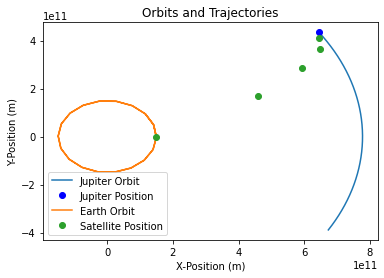

In [2724]:
# Position Equations for Planets
x_pos_Jupiter = lambda t : r_Jupiter*np.cos((omega*t)-(np.pi/6))
y_pos_Jupiter = lambda t : r_Jupiter*np.sin((omega*t)-(np.pi/6))
x_pos_Earth = lambda t : x0*np.cos(1.99e-7*t)
y_pos_Earth = lambda t : x0*np.sin(1.99e-7*t)

#Lists for Storing Positions
x_Jup_list = []
y_Jup_list = []
x_Earth_list = []
y_Earth_list = []

#Adding the Positions at each time to the lists
for t in range(0, int(t_max+1750000), 1750000):
    x_Jup = x_pos_Jupiter(t)
    y_Jup = y_pos_Jupiter(t)
    x_Jup_list.append(x_Jup)
    y_Jup_list.append(y_Jup)
    x_Earth = x_pos_Earth(t)
    y_Earth = y_pos_Earth(t)
    x_Earth_list.append(x_Earth)
    y_Earth_list.append(y_Earth)
    
#Plotting for the Planets
plt.plot(x_Jup_list, y_Jup_list, label='Jupiter Orbit')
plt.plot(x_Jup_list[-1], y_Jup_list[-1],  'o', color='blue', label='Jupiter Position') 
plt.plot(x_Earth_list, y_Earth_list, label='Earth Orbit')
print(x_Jup_list[-1], y_Jup_list[-1])

#Plotting for the Satellite
satellite_pos_x = [1.495978707e11, 4.60191464e+11, 5.92873011e+11, 6.47529096e+11, 6.44393445e+11] #initial, 1/4 way through, 1/2 way through, 3/4 way through, final
satellite_pos_y = [0, 1.70407965e+11, 2.85359087e+11, 3.63468863e+11, 4.09282964e+11] #initial, 1/4 way through, 1/2 way through, 3/4 way through, final
plt.plot(satellite_pos_x, satellite_pos_y, 'o', label='Satellite Position')
plt.xlabel('X-Position (m)')
plt.ylabel('Y-Position (m)')
plt.title('Orbits and Trajectories')
plt.legend(loc='lower left')